In [1]:
import sys
from os.path import expanduser, join
home = expanduser("~")
sys.path.append(join(home, 'Repositories/QuREBB'))
from importlib import reload  # Python 3.4+

import lib.protocol as protocol
from protocols.tutorial_protocols import ProtocolC

import numpy as np
import lib.NQobj as nq
import qutip as qt
import lib.states as st
qt.settings.auto_tidyup = False


In [2]:
params = {
    'f_operation': 0e9,
    'kappa_in': 21.8e9,
    'kappa_loss': 21.8e9, 
    'gamma': 92.5e6,
    'delta': 0e9,
    'splitting': 1e9,
    'g': 8.38e9,
    'dim':2,
    # 'alpha',
    'gamma_dephasing': 30.5e6,
    'link_loss':0.9,
    'insertion_loss': 0.5,
    'dc_rate': 0.000,
    'ideal':False
}
params['kappa_r'] = params['kappa_in']
params['kappa_t'] = params['kappa_loss']

In [3]:
sweep_params={'f_operation': np.linspace(-10e9, 10e9, 5), "delta": np.linspace(-10e11, 10e11, 5)}

In [4]:
ps = protocol.ProtocolSweep(ProtocolC, params, sweep_params)

In [5]:
ps.run()

Sweep time with multi was 7.546 s


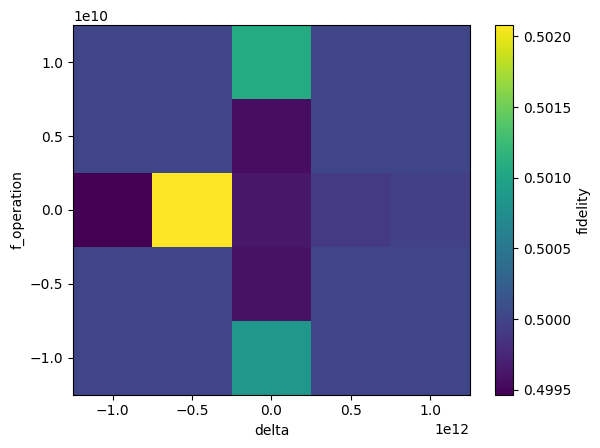

In [6]:
ps.dataset.fidelity.plot()

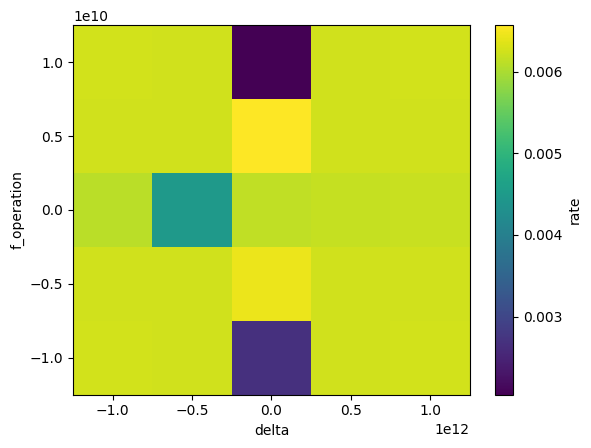

In [15]:
ps.dataset.rate.plot()

In [7]:
ps.get_fidelity_rate_curve()

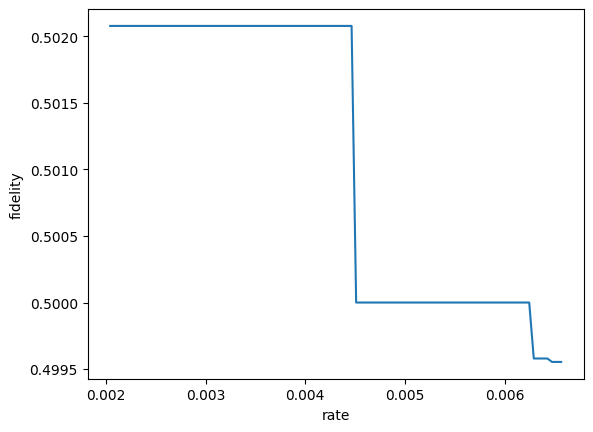

In [14]:
ps.dataset_fidelity_rate.fidelity.plot()

In [9]:
ds = ps.dataset

In [10]:
import xarray as xr

In [11]:
mask = (ds.fidelity >= ds.fidelity.where(ds.rate > rate).max())
filtered_mask = mask.groupby(mask)[True][0]
for coord in filtered_mask.coords:
    if "stacked" in coord:
        filtered_mask = filtered_mask.reset_coords(coord, drop=True)
max_fidelity = ds.sel(filtered_mask.coords)
dataset = xr.Dataset({"fidelity": ("rate", [float(max_fidelity.fidelity)])}, {"rate": [float(max_fidelity.rate)]})
dataset = dataset.assign_coords(max_fidelity.coords)
dataset

NameError: name 'rate' is not defined

In [ ]:
xr.Dataset({"fidelity": ("rate", [2])}, {"rate", [4]})

In [ ]:
fidelities = []
mask = (ds.fidelity >= ds.fidelity.where(ds.rate > rate).max())
fidelity = ds.fidelity.groupby(mask)[True][0]
for coord in fidelity.coords:
    if "stacked" in coord:
        fidelity = fidelity.reset_coords(coord, drop=True)
fidelities(fidelity.expand_dims("rate").assign_coords(rate=[.1]))
# fidelities.append(dataset.assign_coords(max_fidelity.coords))
# dataset_fidelity_rate = xr.combine_by_coords(fidelities)

In [ ]:
ps.save_folder = "~/Desktop/simulation_datasets"

In [ ]:
ps.save_name = "dataset"

In [ ]:
ps.save_dataset()

In [ ]:
['Ea','La','Eb', 'Lb'][0::3]

In [ ]:
['Ea','La','Eb', 'Lb'][1:-1]

In [ ]:
import protocols.tutorial_protocols as prot

In [ ]:
nq.tensor(prot.no_vacuum_projector('a', 2), prot.no_vacuum_projector('b', 2))

In [ ]:
nq.tensor(nq.name(qt.qeye(2), 'a', "oper"), nq.name(qt.qeye(2), 'b', "oper"))

In [ ]:
nq.tensor(nq.name(qt.basis_dm(2), 'a', "oper"), nq.name(qt.basis(2), 'b', "oper"))

In [ ]:
ps.dataset